In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import sys
import torch
import seaborn as sns


In [2]:

def load_data(filepath):
    """
    Loads the plant forecast data from a CSV file.
    """
    try:
        # Read CSV file. Adjust `parse_dates` if necessary depending on your columns.
        df = pd.read_csv(filepath, parse_dates=['effectivedate'])
        return df
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        sys.exit(1)

In [3]:
data=load_data("final_data.csv")

In [4]:
print(data['effectivedate'].dtype)


datetime64[ns]


In [5]:
data.head()

,effectivedate,forecast_provider,plant_name,fc0,fc1200,fc40,fc55,fc60,fc75,production,...,sunshine_duration,precipitation_sum,rain_sum,showers_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum
0,2022-01-01 00:00:00,Provider 1,Plant A,5.498515,8.245363,2.456326,2.932484,2.932484,2.371797,11.886,...,30312.5,0.0,0.0,0.0,0.0,0.0,9.7,25.9,38.0,8.58
1,2022-01-01 00:00:00,Provider 2,Plant A,5.040864,8.276702,7.520027,7.263067,7.088938,6.841885,11.886,...,30312.5,0.0,0.0,0.0,0.0,0.0,9.7,25.9,38.0,8.58
2,2022-01-01 00:00:00,Provider 5,Plant A,5.498520,8.245360,2.456330,2.932480,2.932480,2.371800,11.886,...,30312.5,0.0,0.0,0.0,0.0,0.0,9.7,25.9,38.0,8.58
3,2022-01-01 01:00:00,Provider 1,Plant A,9.926987,6.013426,5.336242,3.760841,3.760841,2.797678,9.897,...,30312.5,0.0,0.0,0.0,0.0,0.0,9.7,25.9,38.0,8.58
4,2022-01-01 01:00:00,Provider 2,Plant A,9.561205,6.252626,8.984542,7.975365,7.543575,6.340461,9.897,...,30312.5,0.0,0.0,0.0,0.0,0.0,9.7,25.9,38.0,8.58


In [6]:
len(data)

1165425

In [7]:
def summarize_entries(data):
    """
    Summarizes the number of entries for each plant with respect to Provider 1 and Provider 2.

    Args:
        data (pd.DataFrame): The plant forecast DataFrame.

    Returns:
        pd.DataFrame: A summary table of entry counts.
    """
    # Extract hour from the datetime column
    data['hour'] = data['effectivedate'].dt.floor('h')

    # Group by plant and provider, then count unique hours
    summary = (
        data.groupby(['plant_name', 'forecast_provider'])
        .size()
        .unstack(fill_value=0)
        .rename(columns={col: f"Count_{col}" for col in data['forecast_provider'].unique()})
    )
    return summary


In [8]:
summary_table = summarize_entries(data)

# Display the summary
print(summary_table)

forecast_provider  Count_Provider 1  Count_Provider 2  Count_Provider 3  \
plant_name                                                                
Plant A                       25514             25493                 0   
Plant B                       25514             25493                 0   
Plant C                       25490             25495              4200   
Plant D                       25514             25493                 0   
Plant E                       25514             25519                 0   
Plant F                       25514             25493                 0   
Plant G                       25514             25519              2304   
Plant H                       25514             25493                 0   
Plant I                       25514             16423                 0   
Plant J                       25514             25493                 0   
Plant K                       25514             25493                 0   
Plant L                  

In [10]:
import pandas as pd

def summarize_entries_for_providers(data, providers):
    """
    Summarizes the number of entries for each plant with respect to specific providers.

    Args:
        data (pd.DataFrame): The plant forecast DataFrame.
        providers (list): List of providers to include in the summary.

    Returns:
        pd.DataFrame: A summary table of entry counts for the specified providers.
    """
    # Filter the data for the specified providers
    filtered_data = data[data['forecast_provider'].isin(providers)]

    # Extract hour from the datetime column
    filtered_data['hour'] = filtered_data['effectivedate'].dt.floor('h')

    # Group by plant and provider, then count unique hours
    summary = (
        filtered_data.groupby(['plant_name', 'forecast_provider'])
        .size()
        .unstack(fill_value=0)
        .rename(columns={provider: f"Count_{provider}" for provider in providers})
    )
    return summary

# Example usage
# Define the providers to filter
selected_providers = ['Provider 1', 'Provider 2', 'Provider 3', 'Provider 4']

# Generate the summary for selected providers
summary_table = summarize_entries_for_providers(data, selected_providers)



C:\Users\mert.ekici\AppData\Local\Temp\ipykernel_12548\1112650995.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['effectivedate'].dt.floor('h')


In [11]:
summary_table

forecast_provider,Count_Provider 1,Count_Provider 2,Count_Provider 3,Count_Provider 4
plant_name,,,,
Plant A,25514,25493,0,0
Plant B,25514,25493,0,0
Plant C,25490,25495,4200,0
Plant D,25514,25493,0,8256
Plant E,25514,25519,0,0
Plant F,25514,25493,0,0
Plant G,25514,25519,2304,0
Plant H,25514,25493,0,0
Plant I,25514,16423,0,0


In [11]:
def find_missing_hours(data, plants, providers):
    """
    Finds missing hours within the range of `effectivedate` for each plant and provider.

    Args:
        data (pd.DataFrame): The plant forecast DataFrame.
        plants (list): List of plants to include in the analysis.
        providers (list): List of providers to check.

    Returns:
        dict: A dictionary where keys are plant names, and values are DataFrames of missing hours for each provider.
    """
    # Filter data for the specified plants and providers
    filtered_data = data[
        (data['plant_name'].isin(plants)) & (data['forecast_provider'].isin(providers))
    ]

    # Extract hour from the datetime column
    filtered_data['hour'] = filtered_data['effectivedate'].dt.floor('h')

    # Initialize result dictionary
    missing_hours = {}

    # Loop through each plant
    for plant in plants:
        plant_data = filtered_data[filtered_data['plant_name'] == plant]
        plant_missing = {}

        # Loop through each provider
        for provider in providers:
            provider_data = plant_data[plant_data['forecast_provider'] == provider]
            if not provider_data.empty:
                # Determine the full range of hours
                full_range = pd.date_range(
                    start=provider_data['hour'].min(),
                    end=provider_data['hour'].max(),
                    freq='H'
                )

                # Find missing hours
                recorded_hours = provider_data['hour'].unique()
                missing = set(full_range) - set(recorded_hours)
                plant_missing[provider] = sorted(missing)

        if plant_missing:
            missing_hours[plant] = plant_missing

    return missing_hours

In [12]:

# List of plants A to K
plants_A_to_K = [f"Plant {chr(65 + i)}" for i in range(11)]  # Generates ['Plant A', ..., 'Plant K']
providers_to_compare = ['Provider 1', 'Provider 2']
# Example usage
# Find missing hours for plants A to K and Providers 1 and 2
missing_hours_data = find_missing_hours(data, plants_A_to_K, providers_to_compare)

/var/folders/bk/zhl3wr5n70l9ksm1f1hwrhnc0000gn/T/ipykernel_9253/3857231831.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['effectivedate'].dt.floor('h')
/var/folders/bk/zhl3wr5n70l9ksm1f1hwrhnc0000gn/T/ipykernel_9253/3857231831.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(


In [13]:
# Display missing hours
for plant, missing_info in missing_hours_data.items():
    print(f"Missing hours for {plant}:")
    for provider, missing_hours in missing_info.items():
        print(f"  {provider}: {missing_hours[:5]}... ({len(missing_hours)} total)")  # Display first 5 for brevity
    print()

Missing hours for Plant A:
  Provider 1: [Timestamp('2023-08-06 00:00:00'), Timestamp('2023-08-06 01:00:00'), Timestamp('2023-08-06 02:00:00'), Timestamp('2023-08-06 03:00:00'), Timestamp('2023-08-06 04:00:00')]... (46 total)
  Provider 2: [Timestamp('2022-01-13 22:00:00'), Timestamp('2022-01-13 23:00:00'), Timestamp('2022-01-28 00:00:00'), Timestamp('2022-01-28 01:00:00'), Timestamp('2022-01-28 02:00:00')]... (67 total)

Missing hours for Plant B:
  Provider 1: [Timestamp('2023-08-06 00:00:00'), Timestamp('2023-08-06 01:00:00'), Timestamp('2023-08-06 02:00:00'), Timestamp('2023-08-06 03:00:00'), Timestamp('2023-08-06 04:00:00')]... (46 total)
  Provider 2: [Timestamp('2022-01-13 22:00:00'), Timestamp('2022-01-13 23:00:00'), Timestamp('2022-01-28 00:00:00'), Timestamp('2022-01-28 01:00:00'), Timestamp('2022-01-28 02:00:00')]... (67 total)

Missing hours for Plant C:
  Provider 1: [Timestamp('2023-08-06 00:00:00'), Timestamp('2023-08-06 01:00:00'), Timestamp('2023-08-06 02:00:00'), Time

In [14]:
# Define plants and providers
plants = data['plant_name'].unique().tolist()
providers = ['Provider 1', 'Provider 2']  # Specify the providers you want to impute

# Find missing hours
missing_hours_dict = find_missing_hours(data, plants, providers)

# Display missing hours
for plant, providers_missing in missing_hours_dict.items():
    print(f"Plant: {plant}")
    for provider, missing_hours in providers_missing.items():
        print(f"  Provider: {provider}, Missing Hours: {len(missing_hours)}")

/var/folders/bk/zhl3wr5n70l9ksm1f1hwrhnc0000gn/T/ipykernel_9253/3857231831.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['effectivedate'].dt.floor('h')
/var/folders/bk/zhl3wr5n70l9ksm1f1hwrhnc0000gn/T/ipykernel_9253/3857231831.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(


Plant: Plant A
  Provider: Provider 1, Missing Hours: 46
  Provider: Provider 2, Missing Hours: 67
Plant: Plant B
  Provider: Provider 1, Missing Hours: 46
  Provider: Provider 2, Missing Hours: 67
Plant: Plant C
  Provider: Provider 1, Missing Hours: 70
  Provider: Provider 2, Missing Hours: 65
Plant: Plant D
  Provider: Provider 1, Missing Hours: 46
  Provider: Provider 2, Missing Hours: 67
Plant: Plant E
  Provider: Provider 1, Missing Hours: 46
  Provider: Provider 2, Missing Hours: 41
Plant: Plant F
  Provider: Provider 1, Missing Hours: 46
  Provider: Provider 2, Missing Hours: 67
Plant: Plant G
  Provider: Provider 1, Missing Hours: 46
  Provider: Provider 2, Missing Hours: 41
Plant: Plant H
  Provider: Provider 1, Missing Hours: 46
  Provider: Provider 2, Missing Hours: 67
Plant: Plant I
  Provider: Provider 1, Missing Hours: 46
  Provider: Provider 2, Missing Hours: 41
Plant: Plant J
  Provider: Provider 1, Missing Hours: 46
  Provider: Provider 2, Missing Hours: 67
Plant: Pla

In [27]:
def check_entry_consistency(data):
    """
    Checks if all plants have the same number of entries for each hour 
    with respect to Provider 1 and Provider 2.

    Args:
        data (pd.DataFrame): The plant forecast DataFrame.

    Returns:
        dict: A dictionary with plant names as keys and True/False as values indicating consistency.
    """
    # Ensure the data contains only necessary columns
    required_columns = ['effectivedate', 'forecast_provider', 'plant_name']
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"The DataFrame must contain the following columns: {required_columns}")

    # Extract hour from the datetime column for grouping
    data['hour'] = data['effectivedate'].dt.floor('h')  # Use 'h' as 'H' is deprecated

    # Group data by plant, hour, and provider
    grouped = data.groupby(['plant_name', 'hour', 'forecast_provider']).size()

    # Reshape to make it easier to compare counts across providers
    reshaped = grouped.unstack(level='forecast_provider', fill_value=0)

    # Compare counts between Provider 1 and Provider 2 for each plant
    consistency_check = {}
    for plant in reshaped.index.get_level_values('plant_name').unique():
        plant_data = reshaped.loc[plant]
        consistency_check[plant] = (plant_data['Provider 1'] == plant_data['Provider 2']).all()

    # Return a dictionary indicating consistency for each plant
    return consistency_check


In [28]:
import seaborn

In [29]:
# Example usage
consistency_results = check_entry_consistency(complete_df)

# Print results
for plant, is_consistent in consistency_results.items():
    print(f"Plant {plant}: {'Consistent' if is_consistent else 'Inconsistent'}")

Plant Plant A: Consistent
Plant Plant B: Consistent
Plant Plant C: Consistent
Plant Plant D: Consistent
Plant Plant E: Consistent
Plant Plant F: Consistent
Plant Plant G: Consistent
Plant Plant H: Consistent
Plant Plant I: Inconsistent
Plant Plant J: Consistent
Plant Plant K: Consistent
Plant Plant L: Inconsistent
Plant Plant M: Inconsistent
Plant Plant N: Inconsistent


In [36]:
duplicates = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 0


In [37]:
forecast_columns = [col for col in data.columns if col.startswith('fc')]
negative_forecast = data[(data[forecast_columns] < 0).any(axis=1)]  # Example: No negative values allowed
print(negative_forecast)

Empty DataFrame
Columns: [effectivedate, forecast_provider, plant_name, fc0, fc1200, fc40, fc55, fc60, fc75, production, capacity, temperature_2m, relative_humidity_2m, dew_point_2m, apparent_temperature, precipitation, rain, showers, snowfall, snow_depth, weather_code_x, pressure_msl, surface_pressure, cloud_cover, cloud_cover_low, cloud_cover_mid, cloud_cover_high, et0_fao_evapotranspiration_x, vapour_pressure_deficit, wind_speed_10m, wind_direction_10m, wind_gusts_10m, weather_code_y, et0_fao_evapotranspiration_y, temperature_2m_max, temperature_2m_min, apparent_temperature_max, apparent_temperature_min, sunrise, sunset, daylight_duration, sunshine_duration, precipitation_sum, rain_sum, showers_sum, snowfall_sum, precipitation_hours, wind_speed_10m_max, wind_gusts_10m_max, wind_direction_10m_dominant, shortwave_radiation_sum, hour]
Index: []

[0 rows x 52 columns]


In [38]:
negative_production = data[data["production"] < 0]
print(negative_production)


              effectivedate forecast_provider plant_name       fc0    fc1200  \
10      2022-01-01 10:00:00        Provider 1    Plant A  0.005345  1.260350   
12      2022-01-01 12:00:00        Provider 1    Plant A  0.121923  0.555135   
15      2022-01-01 15:00:00        Provider 1    Plant A  0.549746  0.700233   
58      2022-01-03 10:00:00        Provider 1    Plant A  0.192992  0.664333   
59      2022-01-03 11:00:00        Provider 1    Plant A  0.000000  0.508932   
...                     ...               ...        ...       ...       ...   
1166109 2024-10-29 06:00:00        Provider 6    Plant N  1.968124  2.484481   
1166218 2024-11-02 19:00:00        Provider 6    Plant N  0.140911  0.137522   
1166219 2024-11-02 20:00:00        Provider 6    Plant N  0.003329  0.058174   
1166220 2024-11-02 21:00:00        Provider 6    Plant N  0.002458  0.030490   
1166517 2024-11-15 06:00:00        Provider 6    Plant N  0.130872  0.060606   

             fc40      fc55      fc60  

In [39]:
def check_forecast_exceeds_capacity(data, forecast_columns, capacity_column='capacity'):
    """
    Checks if any forecast value exceeds the plant's capacity.

    Args:
        data (pd.DataFrame): The plant forecast DataFrame.
        forecast_columns (list): List of forecast columns to check.
        capacity_column (str): The column that specifies plant capacity.

    Returns:
        pd.DataFrame: Rows where any forecast exceeds capacity.
    """
    # Check if the capacity column exists
    if capacity_column not in data.columns:
        raise ValueError(f"The capacity column '{capacity_column}' is missing in the dataset.")
    
    # Broadcast the capacity column to match the shape of forecast columns
    capacity_broadcast = data[capacity_column].values[:, None]  # Convert to 2D for alignment

    # Flag rows where any forecast exceeds capacity
    exceeded = data[
        (data[forecast_columns] > capacity_broadcast).any(axis=1)
    ]
    return exceeded


# Example usage
# Assuming 'capacity' is a column in your data and all forecast columns start with 'fc'
forecast_columns = [col for col in data.columns if col.startswith('fc')]

# Call the function
exceeded_capacity_rows = check_forecast_exceeds_capacity(data, forecast_columns)




In [40]:
forecast_columns

['fc0', 'fc1200', 'fc40', 'fc55', 'fc60', 'fc75']

In [41]:
# Display exceeded rows directly in the notebook
from IPython.display import display

display(exceeded_capacity_rows[['fc0', 'fc1200', 'fc40', 'fc55', 'fc60', 'fc75', 'capacity']])


,fc0,fc1200,fc40,fc55,fc60,fc75,capacity
264266,50.669500,46.124898,50.669500,50.933973,50.933973,50.808344,50.5
264267,45.569531,46.937078,50.521848,50.521848,50.521848,50.521848,50.5
264565,51.000000,26.114803,33.823746,31.385715,31.385715,30.317658,50.5
264566,47.031562,26.110531,50.776141,51.000000,51.000000,51.000000,50.5
264900,49.991355,38.041949,50.060137,51.000000,51.000000,48.672785,50.5
...,...,...,...,...,...,...,...
1019293,1.199910,1.199940,1.199930,1.199930,1.199930,2.090960,1.2
1019775,1.199890,1.062690,1.199890,1.199890,1.199890,1.661660,1.2
1023878,1.080110,1.091320,1.080110,1.080110,1.080110,1.241640,1.2
1028978,1.199890,1.059660,1.199890,1.199890,1.199890,1.374940,1.2


In [42]:
def check_production_exceeds_capacity(data, production_column='production', capacity_column='capacity'):
    """
    Checks if the produced amount exceeds the plant's capacity.

    Args:
        data (pd.DataFrame): The plant production DataFrame.
        production_column (str): The column that specifies produced amounts.
        capacity_column (str): The column that specifies plant capacity.

    Returns:
        pd.DataFrame: Rows where production exceeds capacity.
    """
    # Check if the required columns exist
    if production_column not in data.columns:
        raise ValueError(f"The production column '{production_column}' is missing in the dataset.")
    if capacity_column not in data.columns:
        raise ValueError(f"The capacity column '{capacity_column}' is missing in the dataset.")

    # Find rows where production exceeds capacity
    exceeded = data[data[production_column] > data[capacity_column]]
    return exceeded




In [43]:
# Example usage
# Assuming 'production' and 'capacity' are columns in your dataset
exceeded_production_rows = check_production_exceeds_capacity(data)

In [44]:
display(exceeded_production_rows[['production', 'capacity']])

,production,capacity
24841,25.24,25.2
24987,25.24,25.2
24988,25.24,25.2
24989,25.24,25.2
24990,25.24,25.2
...,...,...
86678,25.23,25.2
86679,25.24,25.2
86680,25.21,25.2
86686,25.27,25.2


fc0           0.968192
fc1200        0.919640
fc40          0.957281
fc55          0.955224
fc60          0.955085
fc75          0.952944
production    1.000000
Name: production, dtype: float64


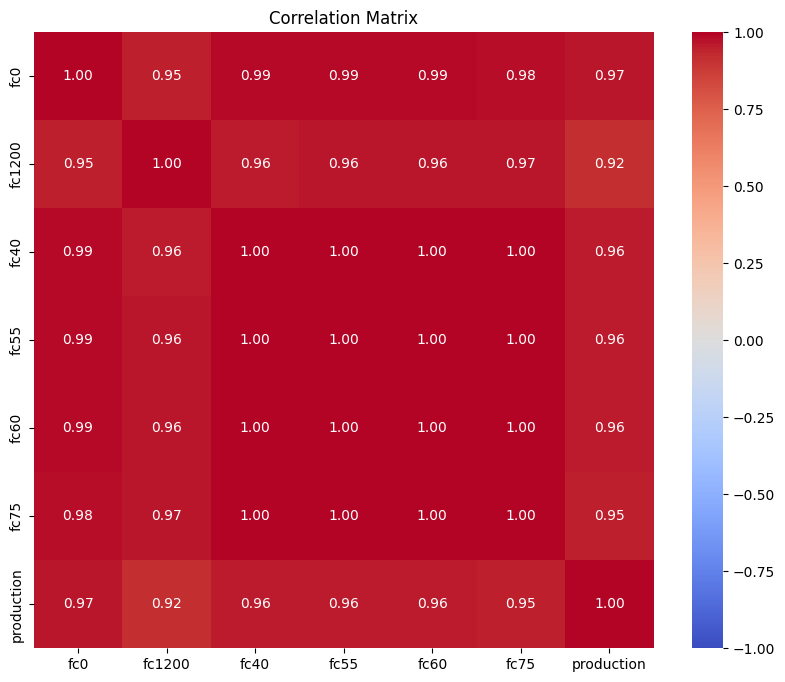

In [45]:
corr_matrix = data[forecast_columns + ['production']].corr()
print(corr_matrix['production'])
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [46]:
data['utilization'] = data['production'] / data['capacity']
print(data['utilization'].describe())
print(data['utilization'].mean())










count    1.165425e+06
mean     3.424802e-01
std      3.301709e-01
min     -3.541667e-02
25%      3.913793e-02
50%      2.303030e-01
75%      6.257511e-01
max      1.002778e+00
Name: utilization, dtype: float64
0.3424801746329622


In [47]:
#Filter production data for each Plant to avoid multiple production values for each hour
production_data = data.groupby(['plant_name', 'effectivedate'])['production'].first().reset_index()

In [48]:
production_data

,plant_name,effectivedate,production
0,Plant A,2022-01-01 00:00:00,11.886
1,Plant A,2022-01-01 01:00:00,9.897
2,Plant A,2022-01-01 02:00:00,7.659
3,Plant A,2022-01-01 03:00:00,0.332
4,Plant A,2022-01-01 04:00:00,0.251
...,...,...,...
337363,Plant N,2024-11-30 19:00:00,12.280
337364,Plant N,2024-11-30 20:00:00,8.940
337365,Plant N,2024-11-30 21:00:00,11.980
337366,Plant N,2024-11-30 22:00:00,17.280


In [49]:
plant_a_production = production_data[production_data['plant_name'] == 'Plant A']
len(plant_a_production)

25560

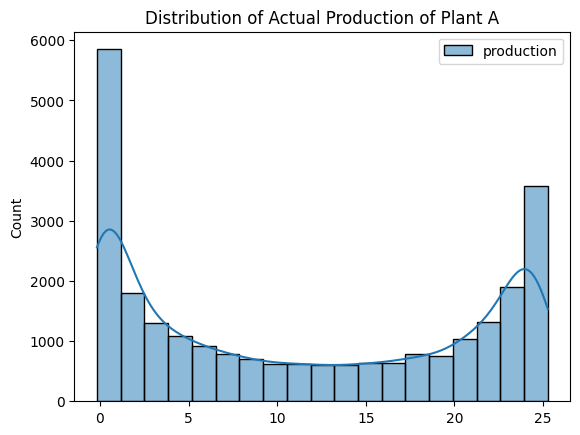

In [50]:

sns.histplot(plant_a_production, kde=True)
plt.title('Distribution of Actual Production of Plant A')
plt.show()
#TODO fc_0 and fc1200 plotting


In [51]:
fc_0_plant_a = data.groupby(['plant_name', 'effectivedate','forecast_provider'])['fc0'].first().reset_index()

In [52]:
fc_0_plant_a.tail()

,plant_name,effectivedate,forecast_provider,fc0
1166868,Plant N,2024-11-30 22:00:00,Provider 6,7.785483
1166869,Plant N,2024-11-30 23:00:00,Provider 1,12.228749
1166870,Plant N,2024-11-30 23:00:00,Provider 2,14.693318
1166871,Plant N,2024-11-30 23:00:00,Provider 5,14.693320
1166872,Plant N,2024-11-30 23:00:00,Provider 6,13.564514


In [53]:
fc_0_plant_a_provider1= fc_0_plant_a[(fc_0_plant_a['plant_name'] == 'Plant A') & (fc_0_plant_a['forecast_provider'] == 'Provider 1')]


In [54]:
fc_0_plant_a_provider1.head()

,plant_name,effectivedate,forecast_provider,fc0
0,Plant A,2022-01-01 00:00:00,Provider 1,5.498515
3,Plant A,2022-01-01 01:00:00,Provider 1,9.926987
6,Plant A,2022-01-01 02:00:00,Provider 1,6.701120
9,Plant A,2022-01-01 03:00:00,Provider 1,7.487892
12,Plant A,2022-01-01 04:00:00,Provider 1,0.367348


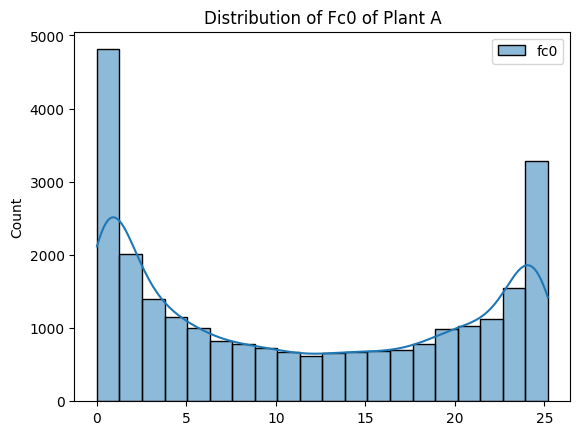

In [70]:
sns.histplot(fc_0_plant_a_provider1, kde=True)
plt.title('Distribution of Fc0 of Plant A')
plt.show()

In [43]:
plant_b_production = production_data[production_data['plant_name'] == 'Plant B']
len(plant_b_production)

25519

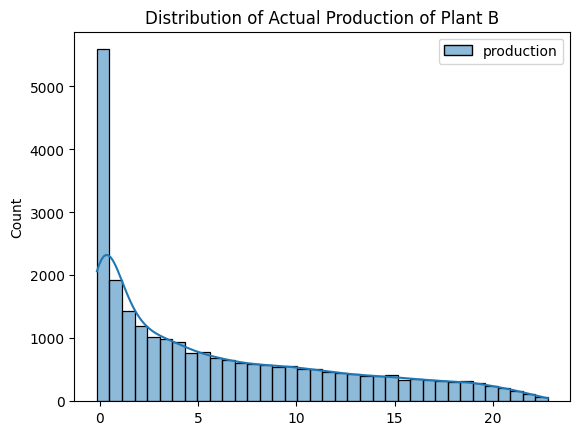

In [ ]:

sns.histplot(plant_b_production, kde=True)
plt.title('Distribution of Actual Production of Plant B')
plt.show()


In [37]:
plant_c_production = production_data[production_data['plant_name'] == 'Plant C']
len(plant_c_production)

25519

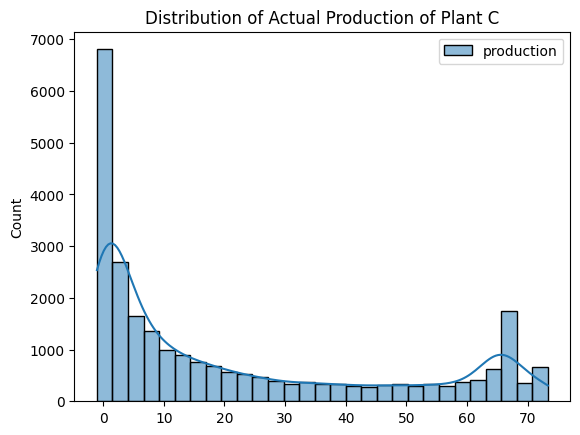

In [ ]:

sns.histplot(plant_c_production, kde=True)
plt.title('Distribution of Actual Production of Plant C')
plt.show()

In [46]:
plant_d_production = production_data[production_data['plant_name'] == 'Plant D']
len(plant_d_production)

25519

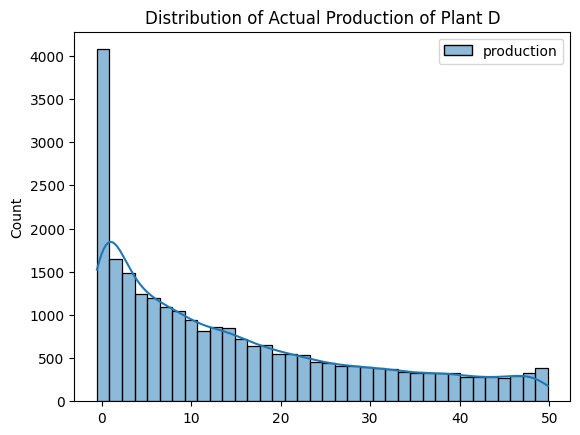

In [47]:
sns.histplot(plant_d_production, kde=True)
plt.title('Distribution of Actual Production of Plant D')
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error

#provider with least mae for fc0
providers = data['forecast_provider'].unique()
for provider in providers:
    provider_data = data[data['forecast_provider'] == provider]
    mae = mean_absolute_error(provider_data['production'], provider_data['fc0'])
    print(f"Provider: {provider}, MAE: {mae}")
#TODO scale by capacity

Provider: Provider 1, MAE: 1.9968529270167898
Provider: Provider 2, MAE: 2.173832999188433
Provider: Provider 5, MAE: 2.060111474603235
Provider: Provider 6, MAE: 1.8248543040113396
Provider: Provider 3, MAE: 6.9212569188191875
Provider: Provider 4, MAE: 2.7958477263278567


In [60]:
#provider with least mae for fc0
providers = data['forecast_provider'].unique()
for provider in providers:
    provider_data = data[data['forecast_provider'] == provider]
    mae = mean_absolute_error(provider_data['production'], provider_data['fc1200'])
    print(f"Provider: {provider}, MAE: {mae}")
#TODO scale by capacity

Provider: Provider 1, MAE: 3.9118430397939443
Provider: Provider 2, MAE: 3.340451868277446
Provider: Provider 5, MAE: 3.264996920012563
Provider: Provider 6, MAE: 2.9700853169609633
Provider: Provider 3, MAE: 8.922316420664206
Provider: Provider 4, MAE: 3.309740814771547
